## <ins>**Raindrop Refinement: Cleaning and Analyzing Pakistan's Precipitation Data**
**Name**: Rayan Alam

**Student ID**: 100908385

**Course**: Scientific Data Analysis (CSCI 2000U)

**Date**: November 25, 2024

## Table of Contents
* [Introduction](#Introduction)
* [Analyses](#Analyses)
    * [Checking Directory](#ensuring-that-we-are-in-the-correct-directory-before-proceeding)
    * [Loading Libraries](#importing-the-necessary-libraries-into-python)
    * [Loading Data](#importing-the-dataset-into-python)
    * [Cleaning Data Part One](#removing-unnecessary-spaces-and-characters-in-the-column-headers)
    * [Cleaning Data Part Two](#addressing-any-missing-or-undefined-values-in-the-dataset)
    * [Exploratory Data Analysis](#proceeding-to-exploratory-data-analysis-eda-after-cleaning-the-dataset)
    * [First Set of Generated Plots](#analyzing-rainfall-trends-and-seasonal-patterns-over-time-with-plots)
        * [Manipulating Data](#identifying-and-analyzing-total-yearly-rainfall-count-from-the-lineplot)
    * [Second Set of Generated Plots](#analyzing-rainfall-trends-and-seasonal-patterns-over-certain-intervals-of-time-with-plots)
        * [Manipulating Data](#identifying-and-analyzing-rainfall-peaks-from-the-lineplots)
    * [Third Set of Generated Plots](#identifying-and-analyzing-rainfall-intensityfrequency-from-the-facetgrid)
        * [Manipulating Data](#identifying-and-analyzing-rainfall-intensityfrequency-from-the-facetgrid)
* [Discussion](#discussion)
* [References](#references)
    

## Introduction

#### Pakistan's Devastating Rainfall Crisis - Significance and Key Questions
Since 1901, Pakistan has faced devastating rainfall and flooding events, many of which have caused significant destruction across the entire country. This issue reached a historic peak in 2022, when more than a third of the country was submerged due to unprecedented rainfall. The impact was catastrophic, with over 33 million people affected, countless homes destroyed, and nearly 1,500 lives tragically lost (Zaman, 2024). Pakistan’s limited infrastructure and resources make it difficult to effectively manage and mitigate the effects of such extreme weather events. As someone with a Pakistani background and several relatives currently living there, I have a very personal connection to the country and its culture. Therefore, I believe there is potential to better understand and predict these rainfall patterns. This analysis employs advanced technology and follows the data science workflow, utilizing Python frameworks to examine rainfall data in Pakistan from 1901 up until 2016, which was directly taken from [Kaggle](https://www.kaggle.com/datasets). The dataset titled "Rainfall in Pakistan" was published by Zeeshan-ul-hassan Usmani and it contains annual rainfall measurements (in millimeters) recorded for each month throughout the year. What I hope to achieve from analyzing this dataset is to be able to identify trends and patterns that could aid in Pakistan's future preparedness and response efforts. Additionally, I aim to explore an extremely important and somewhat interesting question: *How has the intensity of extreme rainfall events in Pakistan evolved over the past century, and what potential connections can be drawn between these changes and the effects of global climate change?*

## Analyses

#### Ensuring That We Are in the Correct Directory Before Proceeding
- This is fundamental for maintaining a clean, efficient, and error-free data analysis workflow


In [181]:
import os

print(os.getcwd())

c:\Users\alamr\CSCI 2000U\Assignment


#### Importing the Necessary Libraries into Python
- This step is required in order to manipulate, analyze, and visualize data effectively
- The Pandas library (McKinney, 2010) facilitates data reading and analysis, while the Seaborn (Waskom, 2021) and Matplotlib (Hunter, 2007) libraries enable data visualization through various plots

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Dataset into Python
- This step is required in order to manipulate, analyze, and visualize data effectively

In [183]:
d = pd.read_csv('Rainfall_1901_2016_PAK.csv')
d.head(n = 12)

,Rainfall - (MM),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
5,12.88130,1901,June
6,68.09300,1901,July
7,16.58360,1901,August
8,13.33910,1901,September
9,3.10757,1901,October


#### Removing Unnecessary Spaces and Characters in the Column Headers
- Cleaning the data is important to produce consistent, usable, and accurate data
- The rename() method was discovered through GeeksforGeeks (2024)

In [184]:
print(d.columns)
d.rename(columns = {'Rainfall - (MM)' : 'Rainfall(MM)', ' Year' : 'Year', 'Month' : 'Month'}, inplace = True)
print(d.columns)
d.head(n = 12)

Index(['Rainfall - (MM)', ' Year', 'Month'], dtype='object')
Index(['Rainfall(MM)', 'Year', 'Month'], dtype='object')


,Rainfall(MM),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
5,12.88130,1901,June
6,68.09300,1901,July
7,16.58360,1901,August
8,13.33910,1901,September
9,3.10757,1901,October


#### Addressing Any Missing or Undefined Values in the Dataset
- Cleaning the data is important to produce consistent, usable, and accurate data

In [185]:
print(d.isna().sum())
print(d.notna().sum())

Rainfall(MM)    0
Year            0
Month           0
dtype: int64
Rainfall(MM)    1392
Year            1392
Month           1392
dtype: int64


#### Proceeding to Exploratory Data Analysis (EDA) After Cleaning the Dataset
- EDA is crucial in order to understand the data and what steps can be taken after

In [186]:
d.info()
d.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rainfall(MM)  1392 non-null   float64
 1   Year          1392 non-null   int64  
 2   Month         1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB


,Rainfall(MM),Year
count,1392.00,1392.00
mean,25.14,1958.50
std,22.24,33.50
min,0.11,1901.00
25%,9.59,1929.75
50%,19.65,1958.50
75%,33.75,1987.25
max,154.06,2016.00


#### Analyzing Rainfall Trends and Seasonal Patterns Over Time With Plots
- Plots will help uncover relationships and trends in the data, presenting them in a clear and visual manner for easier interpretation
- The method set_theme() and the containers[0] and errwidth code were discovered through Seaborn (Waskom, 2021)

C:\Users\alamr\AppData\Local\Temp\ipykernel_31096\1721848749.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(d.groupby(['Year']).sum(), marker = 'o', color = 'teal', linestyle = 'dashed')


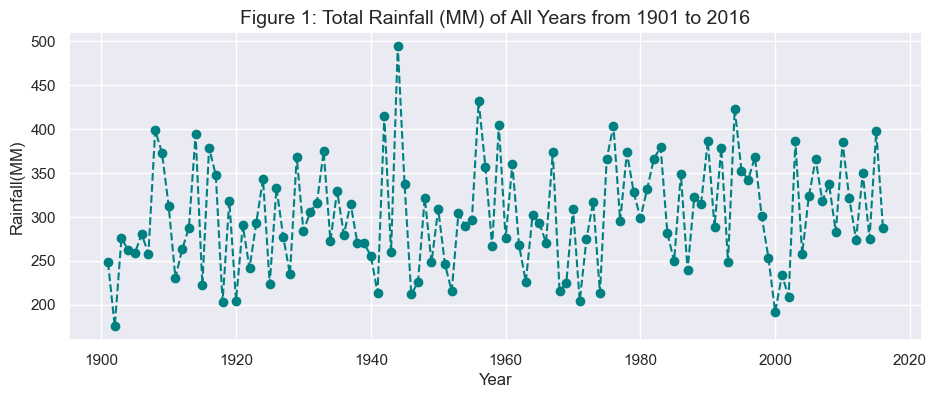

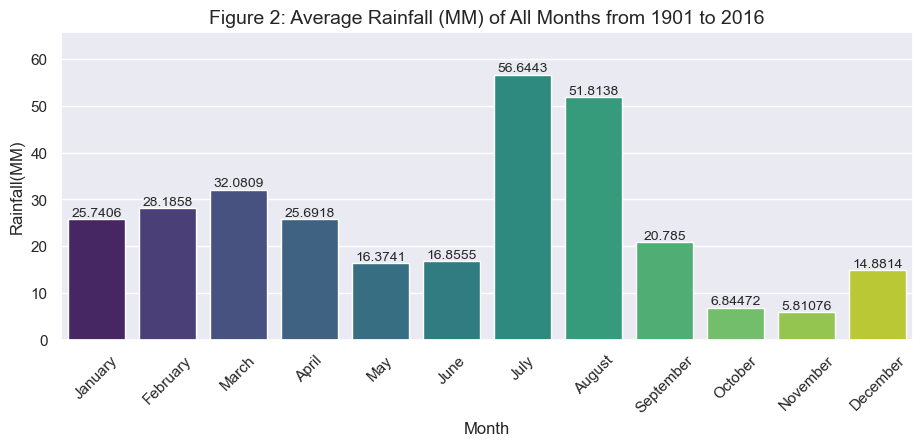

In [187]:
sns.set_theme(style = 'darkgrid') # Choosing a dark theme for the background display of the plots

plt.figure(figsize = (11, 4))
plt.title("Figure 1: Total Rainfall (MM) of All Years from 1901 to 2016", size = 14)
plt.plot(d.groupby(['Year']).sum(), marker = 'o', color = 'teal', linestyle = 'dashed')
plt.xlabel('Year')
plt.ylabel('Rainfall(MM)')

plt.figure(figsize = (11, 4))
plt.title("Figure 2: Average Rainfall (MM) of All Months from 1901 to 2016", size = 14)
plt.xlabel('Months', size = 12)
plt.ylabel('Rainfall - (MM)', size = 12)
p = sns.barplot(data = d, x = 'Month', y = 'Rainfall(MM)', palette = 'viridis', errwidth = 0) # Setting the thickness for the error width bars 
p.set_xticklabels(p.get_xticklabels(), rotation = 45)
p = p.bar_label(p.containers[0], fontsize = 10) # Displaying data on the barplot

#### Identifying and Analyzing Total Yearly Rainfall Count From the LinePlot
- Creating a table makes it easier to summarize the data and key insights in the plots
- The method reset_index() was discovered through ChatGPT (14 Mar. Version) and idmax()/idxmin() was discovered through GeeksforGeeks (2024)

In [188]:
totalYearlyRainfall = d.groupby('Year')['Rainfall(MM)'].sum()

result = totalYearlyRainfall.reset_index() # Creating a table with default index values
result.columns = ['Year', 'Total Rainfall (MM)'] # Setting the appropriate column headers 

print(result.round(2))

max = result.loc[result['Total Rainfall (MM)'].idxmax()] # Getting the maximum index value and its year from the rainfall column
print(max.round(2))

min = result.loc[result['Total Rainfall (MM)'].idxmin()] # Getting the minimum index value and its year from the rainfall column
print(min.round(2))

     Year  Total Rainfall (MM)
0    1901               248.33
1    1902               175.63
2    1903               276.18
3    1904               261.93
4    1905               259.22
..    ...                  ...
111  2012               274.02
112  2013               349.84
113  2014               275.49
114  2015               397.69
115  2016               286.96

[116 rows x 2 columns]
Year                   1944.00
Total Rainfall (MM)     494.37
Name: 43, dtype: float64
Year                   1902.00
Total Rainfall (MM)     175.63
Name: 1, dtype: float64


#### Analyzing Rainfall Trends and Seasonal Patterns Over Certain Intervals of Time With Plots
- Plots will help uncover relationships and trends in the data, presenting them in a clear and visual manner for easier interpretation
- The method ylim() was discovered through GeeksforGeeks (2024) and the containers[0] and errwidth code were discovered through Seaborn (Waskom, 2021)

Rainfall(MM)    1392
Year            1392
Month           1392
dtype: int64
Rainfall(MM)    696.0
Year            696.0
Month           696.0
dtype: float64
     Rainfall(MM)  Year      Month
0        40.42580  1901    January
1        12.30220  1901   February
2        25.51190  1901      March
3        14.29420  1901      April
4        38.30460  1901        May
..            ...   ...        ...
691      22.57120  1958     August
692      31.86380  1958  September
693       3.97290  1958    October
694       7.80382  1958   November
695      54.54020  1958   December

[696 rows x 3 columns]
      Rainfall(MM)  Year      Month
696       38.21750  1959    January
697       36.42600  1959   February
698       25.31040  1959      March
699       24.97130  1959      April
700       32.53600  1959        May
...            ...   ...        ...
1387      60.60610  2016     August
1388      13.76940  2016  September
1389       1.07552  2016    October
1390       2.88480  2016   November
139

C:\Users\alamr\AppData\Local\Temp\ipykernel_31096\1737783455.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(upperHalf.groupby(['Year']).sum(), marker = 'o', color = 'teal', linestyle = 'dashed')
C:\Users\alamr\AppData\Local\Temp\ipykernel_31096\1737783455.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(bottomHalf.groupby(['Year']).sum(), marker = 'o', color = 'teal', linestyle = 'dashed')


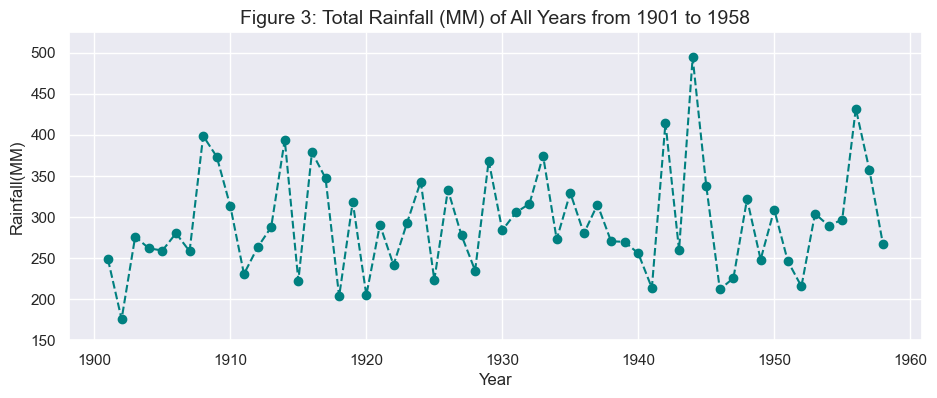

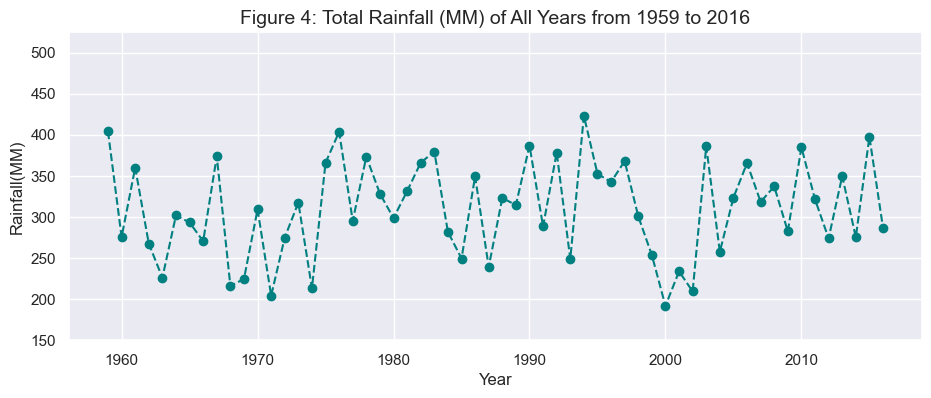

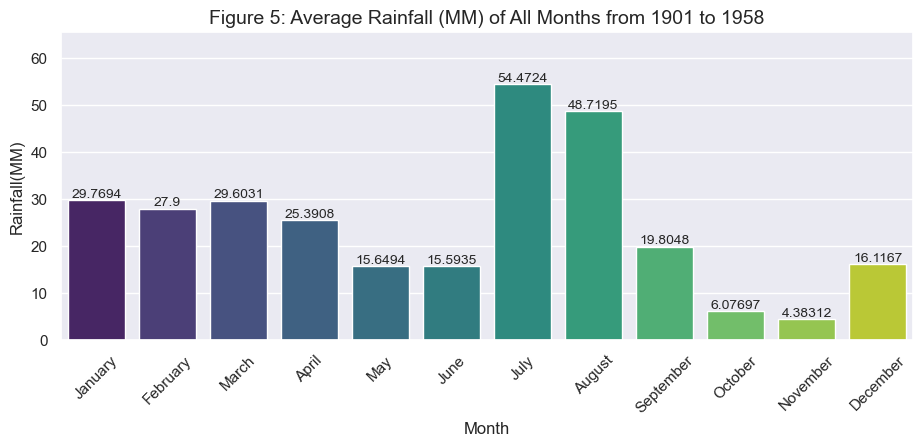

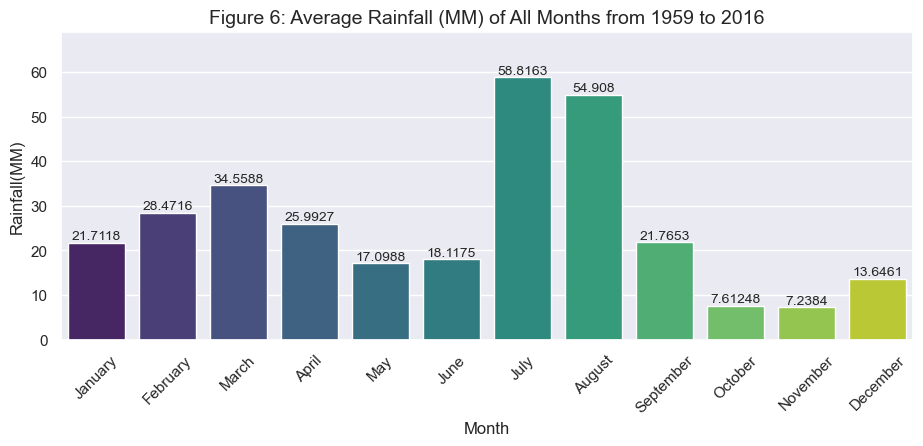

In [189]:
print(d.count())
numRows = d.count()
print(numRows / 2)

upperHalf = d.iloc[:696, :]
bottomHalf = d.iloc[696:, :]

print(upperHalf)
print(bottomHalf)

plt.figure(figsize = (11, 4))
plt.title("Figure 3: Total Rainfall (MM) of All Years from 1901 to 1958", size = 14)
plt.plot(upperHalf.groupby(['Year']).sum(), marker = 'o', color = 'teal', linestyle = 'dashed')
plt.ylim(150, 525) # Setting an appropriate scale for the y-axis
plt.xlabel('Year')
plt.ylabel('Rainfall(MM)')

plt.figure(figsize = (11, 4))
plt.title("Figure 4: Total Rainfall (MM) of All Years from 1959 to 2016", size = 14)
plt.plot(bottomHalf.groupby(['Year']).sum(), marker = 'o', color = 'teal', linestyle = 'dashed')
plt.ylim(150, 525) # Setting an appropriate scale for the y-axis
plt.xlabel('Year')
plt.ylabel('Rainfall(MM)')

plt.figure(figsize = (11, 4))
plt.title("Figure 5: Average Rainfall (MM) of All Months from 1901 to 1958", size = 14)
plt.xlabel('Months', size = 12)
plt.ylabel('Rainfall - (MM)', size = 12)
p = sns.barplot(data = upperHalf, x = 'Month', y = 'Rainfall(MM)', palette = 'viridis', errwidth = 0) # Setting the thickness for the error width bars 
p.set_xticklabels(p.get_xticklabels(), rotation = 45)
p = p.bar_label(p.containers[0], fontsize = 10) # Displaying data on the barplot

plt.figure(figsize = (11, 4))
plt.title("Figure 6: Average Rainfall (MM) of All Months from 1959 to 2016", size = 14)
plt.xlabel('Months', size = 12)
plt.ylabel('Rainfall - (MM)', size = 12)
p = sns.barplot(data = bottomHalf, x = 'Month', y = 'Rainfall(MM)', palette = 'viridis', errwidth = 0) # Setting the thickness for the error width bars 
p.set_xticklabels(p.get_xticklabels(), rotation = 45)
p = p.bar_label(p.containers[0], fontsize = 10) # Displaying data on the barplot

#### Identifying and Analyzing Rainfall Peaks From the LinePlots
- Creating a table makes it easier to summarize the data and key insights in the plots
- The method len() was discovered through ChatGPT (14 Mar. Version)

In [190]:
upperHalfRainfall = upperHalf.groupby('Year').sum()
bottomHalfRainfall = bottomHalf.groupby('Year').sum()

upperHalfRainfallAbove350 = upperHalfRainfall[upperHalfRainfall['Rainfall(MM)'] > 350]
bottomHalfRainfallAbove350 = bottomHalfRainfall[bottomHalfRainfall['Rainfall(MM)'] > 350]

upperHalfRainfallCount = len(upperHalfRainfallAbove350) # Getting the tota length (count) of specific data
bottomHalfRainfallCount = len(bottomHalfRainfallAbove350) # Getting the tota length (count) of specific data

result = pd.DataFrame({'Interval of Time': ['1901 - 1958', '1959 - 2016'],
                       'Total Years of Rainfall (MM) Greater Than 350 MM': [upperHalfRainfallCount, bottomHalfRainfallCount]})

result

C:\Users\alamr\AppData\Local\Temp\ipykernel_31096\4233074224.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upperHalfRainfall = upperHalf.groupby('Year').sum()
C:\Users\alamr\AppData\Local\Temp\ipykernel_31096\4233074224.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bottomHalfRainfall = bottomHalf.groupby('Year').sum()


,Interval of Time,Total Years of Rainfall (MM) Greater Than 350 MM
0,1901 - 1958,10
1,1959 - 2016,17


#### Analyzing Rainfall Intensity and Frquency Over Time With Plots
- Plots will help uncover relationships and trends in the data, presenting them in a clear and visual manner for easier interpretation
- The FacetGrid plot was discovered through Seaborn (Waskom, 2021) and the methods suptitle() and tight_layout() were discovered through Matplotlib (Hunter, 2007)

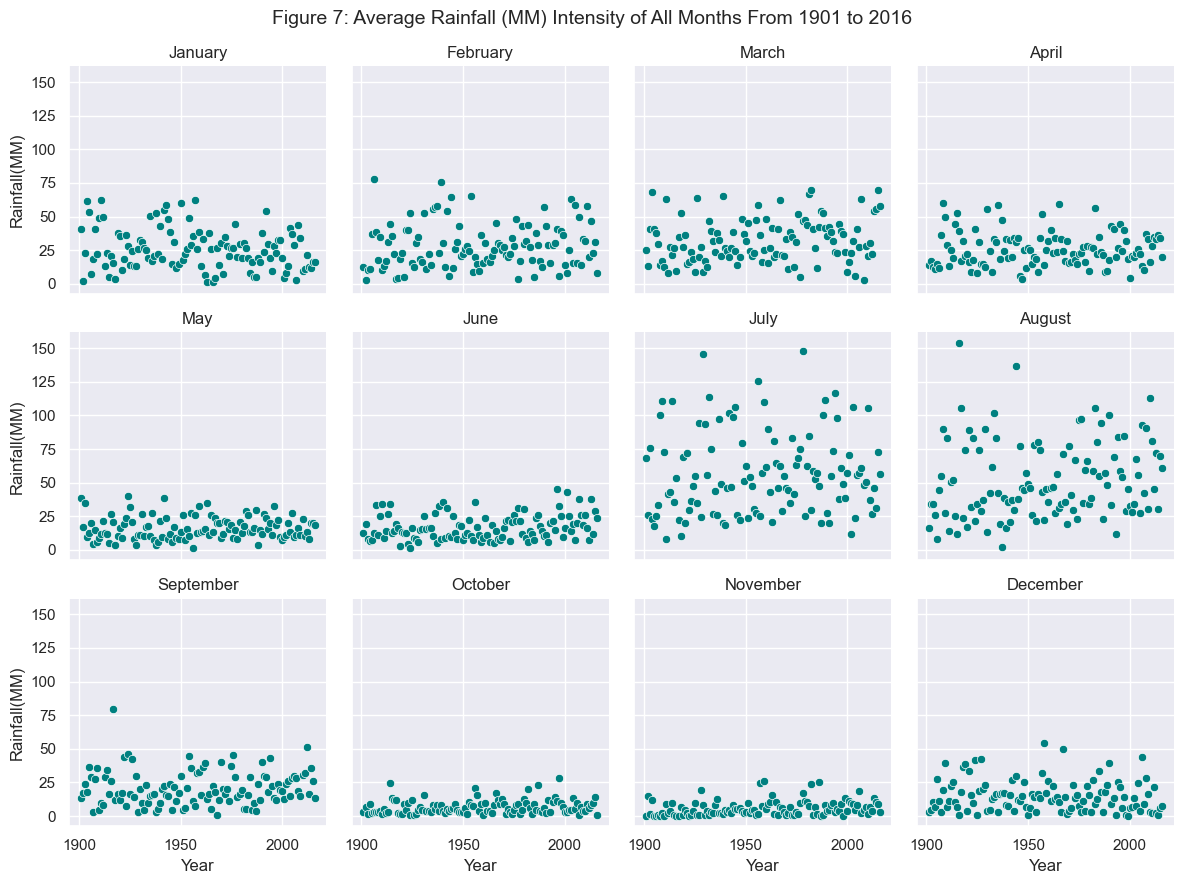

In [191]:
p = sns.FacetGrid(d, col = 'Month', col_wrap = 4, height = 3) 
p.map(sns.scatterplot, 'Year', 'Rainfall(MM)', color = 'teal')
p.set_axis_labels('Year', 'Rainfall(MM)')
p.set_titles(col_template = '{col_name}')
plt.suptitle('Figure 7: Average Rainfall (MM) Intensity of All Months From 1901 to 2016', fontsize = 14) # Setting a title at the top of the plot
plt.tight_layout() # Fitting each plot in the rectangle grid


#### Identifying and Analyzing Rainfall Intensity/Frequency From the FacetGrid
- Creating a table makes it easier to summarize the data and key insights in the plots
- The method reset_index() and the columns code was discovered through ChatGPT (14 Mar. Version) and idmax()/idxmin() was discovered through GeeksforGeeks (2024)

In [192]:
totalMonthlyRainfall = d.groupby('Month')['Rainfall(MM)'].sum()

result = totalMonthlyRainfall.reset_index() # Creating a table with default index values
result.columns = ['Month', 'Total Rainfall (MM)'] # Setting the appropriate column headers 

print(result.round(2))

max = result.loc[result['Total Rainfall (MM)'].idxmax()] # Getting the maximum index value and its year from the rainfall column
print(max)

min = result.loc[result['Total Rainfall (MM)'].idxmin()] # Getting the minimum index value and its year from the rainfall column
print(min)

        Month  Total Rainfall (MM)
0       April              2980.25
1      August              6010.40
2    December              1726.24
3    February              3269.55
4     January              2985.91
5        July              6570.74
6        June              1955.23
7       March              3721.39
8         May              1899.40
9    November               674.05
10    October               793.99
11  September              2411.06
Month                        July
Total Rainfall (MM)    6570.74262
Name: 5, dtype: object
Month                  November
Total Rainfall (MM)    674.0481
Name: 9, dtype: object


## Discussion

##### Key Insights from the Analysis - Implications for Rainfall Patterns in Pakistan

The initial plots of rainfall data from 1901 to 2016 provided a broad overview of the trends in the data. From the line plot representing the total count of rainfall for all years (Figure 1), it was clear that the total annual rainfall remained relatively consistent over time, with a noticeable increase in rainfall peaks starting around 1980. The accompanying table revealed that the year with the highest total rainfall was 1944, with 494 mm, while the lowest occurred in 1902, with only 175 mm. Interestingly, nearly 40% of the data had been processed by the time the maximum rainfall value was reached. The bar plot which displayed the average monthly rainfall across the entire period (Figure 2), showed that summer had the highest average rainfall. However, it was surprising to observe significant rainfall during the winter months, particularly in January, February, March, and April. These initial analyses give a clear sense of the overall consistency of rainfall both annually and monthly, providing a solid foundation for further investigation into the impact of climate change.

After analyzing the initial plots, I divided the data into two periods: 1901-1958 and 1959-2016, to compare rainfall trends over certain intervals of time. The line plots representing the total count of rainfall for both periods (Figure 3 and Figure 4) showed a noticeable increase in rainfall peaks during the 1959-2016 period, compared to the earlier 1901-1958 period. To further support this observation, I created a table showing the number of years with total rainfall exceeding 350 mm for each period. It was found that between 1959 and 2016, there were 7 more years with rainfall above this threshold compared to the 1901-1958 period, which only had 10 such years. Additionally, the bar plots representing the average monthly rainfall for both periods (Figure 5 and Figure 6) revealed that most months in 1959-2016 had higher average rainfall than in 1901-1958. A particularly concerning trend was the significant increase in rainfall during the fall months—September, October, and November—in the later period. This is troubling because these months in Pakistan are typically considered part of the dry season, when rainfall should be less frequent compared to the wetter spring and summer months (ZunNurain, 2023). Overall, the trends observed in these two periods strongly suggest that climate change is having a measurable impact on rainfall patterns over time. If these trends continue, it is likely that by 2040, rainfall in Pakistan could become so intense and unpredictable that it could lead to severe environmental and societal consequences beyond repair.

Lastly, I visualized the data using a facet grid, which displayed scatterplots for the average rainfall of each individual month over time (Figure 7). This grid provided a clearer understanding of both the frequency and intensity of rainfall for each month across the years. Additionally, I created a table summarizing the total rainfall for each month across all years. The table revealed that July received the most rainfall, with over 6,500 mm, while November had the least, with only 674 mm. In many South Asian countries, including Pakistan, the monsoon season plays a significant role in rainfall patterns. The monsoons are driven by prevailing winds, which bring heavy rainfall during the summer months, typically from June to September. This period is marked by a combination of drought conditions and flooding (Dougnac, 2024). From the facet grid, it is clear that July and August are the months that contribute most significantly to intense rainfall in Pakistan, a trend that has remained consistent through 2016. However, the effects of climate change, particularly the warming atmosphere that holds moisture more efficiently, have made these monsoons increasingly erratic and dangerous. The rising intensity of rainfall during the monsoon season poses greater risks of flooding and other extreme weather events, aggravating the challenges already faced by the region.

In reflecting on the question I presented in the introduction, the data I collected on rainfall in Pakistan over the past century provides valuable insights into the increasing intensity of rainfall and its connection to climate change. To summarize the analysis of the various plots and tables, the data clearly shows that rainfall intensity in Pakistan has significantly increased over the years, with no signs of this trend slowing down unless meaningful action is taken. This heightened intensity can be largely attributed to rising temperatures in the region and changes in the monsoon season, both of which are closely linked to the broader impacts of climate change. Climate change is a critical global issue, one that is already displacing and taking the lives of many people, not just in Pakistan, but around the world. I firmly believe that this data can be used to help predict rainfall patterns more accurately in the future, giving individuals and communities the opportunity to prepare for extreme weather events in advance. Incorporating additional variables, such as temperature, would further enhance the data's accuracy and overall usefulness. However, addressing the lack of resources in Pakistan to respond to these challenges is another pressing issue that requires attention. As for tackling climate change, even from 13,000 kilometers away, there are steps we can take. By being mindful of our everyday consumption—whether it’s the food we eat, the electricity we use, or the way we travel—we can reduce our carbon footprint and contribute to global efforts to mitigate climate change. This is essential if we are to avoid witnessing more devastating events like the catastrophic rainfall in Pakistan in 2022. In the end, every effort counts, and collectively, we can work towards a more sustainable future.

## References
**Dataset**: Usmani, Zeeshan-ul-hassan. "Rainfall in Pakistan." *Kaggle*, 13 Mar. 2021, [www.kaggle.com/datasets/zusmani/rainfall-in-pakistan.](www.kaggle.com/datasets/zusmani/rainfall-in-pakistan.)

**Library Package**: Waskom, M. L., (2021). "Seaborn: Statistical Data Visualization." *Journal of Open Source Software*, 6(60), 3021, [https://doi.org/10.21105/joss.03021.](https://doi.org/10.21105/joss.03021.)

**Library Package**: McKinney, W., (2010). "Data structures for Statistical Computing in Python", *Proceedings of the 9th Python in Science Conference*, Volume 445, 2010, [https://doi.org/10.5281/zenodo.3509134](https://doi.org/10.5281/zenodo.3509134)

**Library Package**: Hunter, J. D., (2007). "Matplotlib: A 2D Graphics Environment", *Computing in Science & Engineering*, vol. 9, no. 3, pp. 90-95, 2007. [https://zenodo.org/records/7697899](https://zenodo.org/records/7697899)

**Resource**: Zaman, Sarah. "Excessive Rain, Changing Patterns, Dozens of Deaths Mark Pakistan Monsoon." *Voice of America*, 5 Sept. 2024, [www.voanews.com/a/excessive-rain-changing-patterns-dozens-of-deaths-mark-pakistan-monsoon/7772643.html](www.voanews.com/a/excessive-rain-changing-patterns-dozens-of-deaths-mark-pakistan-monsoon/7772643.html.)

**Resource**: Dougnac, Vanessa. "How Climate Change Is Transforming Pakistan’s Monsoon-driven Coastal Landscape." *La Croix International*, 10 Jul. 2024, [international.la-croix.com/laudato-si/how-climate-change-is-transforming-pakistans-monsoon-driven-coastal-landscape.](international.la-croix.com/laudato-si/how-climate-change-is-transforming-pakistans-monsoon-driven-coastal-landscape.)

**Resource**: ZunNurain. "Weather & Amp; Seasons of Pakistan & Raquo; TrulyPakistan." *Truly Pakistan | Discover • Uncover • Recover*, 4 May 2023, [trulypakistan.net/weather-seasons-of-pakistan.](trulypakistan.net/weather-seasons-of-pakistan.)

**Resource**: "How to Add a Table of Contents in the Jupyter Notebook." *GeeksforGeeks*, 18 Oct. 2023, [www.geeksforgeeks.org/how-to-add-a-table-of-contents-in-the-jupyter-notebook.](www.geeksforgeeks.org/how-to-add-a-table-of-contents-in-the-jupyter-notebook.)

**Resource**: "How to Rename Columns in Pandas DataFrame." *GeeksforGeeks*, 12 Nov. 2024, [www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe.](www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe.)

**Resource**: "Python | Pandas dataframe.idxmax()." *GeeksforGeeks*, 19 Nov. 2018, [www.geeksforgeeks.org/python-pandas-dataframe-idxmax.](www.geeksforgeeks.org/python-pandas-dataframe-idxmax.)

**Resource**: "Python | Pandas dataframe.idxmin()." *GeeksforGeeks*, 19 Nov. 2018, [www.geeksforgeeks.org/python-pandas-dataframe-idxmin.](www.geeksforgeeks.org/python-pandas-dataframe-idxmin.)

**Resource**: "Matplotlib.pyplot.ylim() in Python." *GeeksforGeeks*, 13 Apr. 2020, [www.geeksforgeeks.org/matplotlib-pyplot-ylim-in-python.](www.geeksforgeeks.org/matplotlib-pyplot-ylim-in-python.)

**Resource**: "Is there a function that can create a table based off data but with fresh columns and indices?" prompt. *ChatGPT*, 14 Mar. version, OpenAI, 22 Nov. 2024, [chat.openai.com/chat.](chat.openai.com/chat.) 

**Resource**: "How can I get the total count of an array of data?" prompt. *ChatGPT*, 14 Mar. version, OpenAI, 22 Nov. 2024, [chat.openai.com/chat.](chat.openai.com/chat.) 

**Resource**: "Can you make my sentences sound more flowing and effective?" prompt. *ChatGPT*, 14 Mar. version, OpenAI, 23 Nov. 2024, [chat.openai.com/chat.](chat.openai.com/chat.) 

**Resource**: Lectures Notes from CSCI 2000U